In [1]:
# Initial Setup
import os
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Utility Functions

def load_pkl(file_path):
    """Load data from a .pkl file."""
    with open(file_path, 'rb') as file:
        data = pkl.load(file)
    return data

def load_all_pkls_in_folder(folder_path):
    """Load all .pkl files in the specified folder and combine them into a single list."""
    combined_data = []
    
    for file in os.listdir(folder_path):
        if file.endswith('.pkl'):
            file_path = os.path.join(folder_path, file)
            combined_data.extend(load_pkl(file_path))
            
    return combined_data

def display_spectrogram(data, entry_index):
    """Display the spectrogram for a specific entry in the data."""
    entry = data[entry_index]
    plt.figure(figsize=(10, 4))
    plt.imshow(entry['spectograms'][0])
    plt.title(f"Spectrogram for {entry['filename']}")
    plt.colorbar()
    plt.show()


In [2]:
base_path = '/media/magalhaes/sound/spectograms/'
folder_options = [(folder, folder) for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

global data  # Declare data as a global variable to be used across cells
data = []

entry_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,  # This will be updated after data is loaded
    step=1,
    description='Select Entry:',
    continuous_update=False
)

def load_data(folder_selector_value):
    global data
    folder_path = os.path.join(base_path, folder_selector_value)
    data = load_all_pkls_in_folder(folder_path)
    print(f"Loaded {len(data)} entries.")

    # Update entry_slider's max value after loading new data
    entry_slider.max = len(data) - 1



In [3]:
folder_selector = widgets.Dropdown(
    options=folder_options,
    description='Select Folder:',
    disabled=False,
)

load_button = widgets.Button(description="Load Data")

def on_load_button_click(btn):
    load_data(folder_selector.value)

load_button.on_click(on_load_button_click)

display(folder_selector, load_button)


Dropdown(description='Select Folder:', options=(('Oversampler0', 'Oversampler0'), ('BackgroundNoise_AirAbsorpt…

Button(description='Load Data', style=ButtonStyle())

Loaded 14904 entries.


interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Entry:', max=14903), Out…

Loaded 15018 entries.


interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Entry:', max=15017), Out…

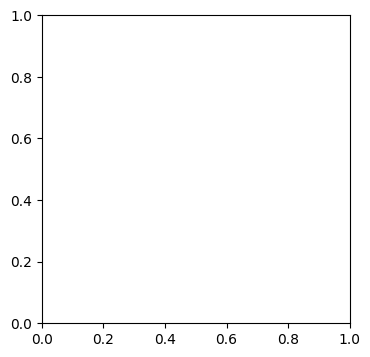

Loaded 13641 entries.


interactive(children=(IntSlider(value=0, continuous_update=False, description='Select Entry:', max=13640), Out…

In [4]:
def update_display(entry_index):
    display_spectrogram(data, entry_index)

widgets.interactive(update_display, entry_index=entry_slider)
